## Research Topic - Predictive Modeling in Healthcare Delivery: Optimizing the Logistics Strategy for Distribution HIV/AIDS Commodities Across Africa - Modelling

In [1]:
ssssss                                                                                                                                                                                                                                                                        import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
pd.set_option('display.max_columns', 50)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("cleaned_supply_chain_data.csv")

In [3]:
df.head()

Unnamed: 0  country   manager delivery_method vendor_terms transport_mode  \
0        4925    Kenya  PMO - US     Direct Drop          EXW            Air   
1        3054    Kenya  PMO - US     Direct Drop          EXW            Air   
2        3312    Kenya  PMO - US     Direct Drop          EXW            Air   
3        2682    Kenya  PMO - US     Direct Drop          EXW            Air   
4        3189  Nigeria  PMO - US     Direct Drop          CIP            Air   

   order_date expected_date actual_date recorded_date product_category  \
0  2010-09-27    2011-02-10  2011-02-10    2011-02-10             HRDT   
1  2012-06-05    2012-07-09  2012-07-09    2012-07-09             HRDT   
2  2010-09-27    2011-02-10  2011-02-10    2011-02-10             HRDT   
3  2009-11-18    2010-02-16  2010-02-19    2010-02-19             HRDT   
4  2009-05-08    2009-09-23  2009-09-23    2009-09-23             HRDT   

  product_type                                      supplier  \
0     HIV test                                 Orgenics, Ltd   
1     HIV test                                 Orgenics, Ltd   
2     HIV test                                 Orgenics, Ltd   
3     HIV test                                 Orgenics, Ltd   
4     HIV test  BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)   

                                  product_feature  \
0  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
1  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
4         HIV 2, New LAV Blot 2 HIV Kit, 18 Tests   

                          product_name product_brand dosage dosage_form  \
0  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
1  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
2  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
3  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
4        HIV 2, New LAV Blot 2 HIV Kit           LAV  150mg    Test kit   

   units_per_pack  total_quantity  total_value  pack_price  unit_price  \
0             100               1        89.00       89.00        0.89   
1             100               1        89.00       89.00        0.89   
2             100               1        89.00       89.00        0.89   
3             100               1        80.00       80.00        0.80   
4              18               1       750.29      750.29       41.68   

          factory_location  priority_status  total_weight  shipping_cost  \
0          Inverness Japan             True        1370.0       14515.01   
1  Alere Medical Co., Ltd.             True         985.0       11034.01   
2          Inverness Japan             True         800.0        8826.00   
3          Inverness Japan             True        1028.0       10083.69   
4     Bio-Rad Laboratories             True          18.0           0.00   

   insurance_cost continent  quantity% delivery_status  \
0            0.19    Africa        0.0  early_delivery   
1            0.12    Africa        0.0  early_delivery   
2            0.19    Africa        0.0  early_delivery   
3            0.17    Africa        0.0         delayed   
4            1.47    Africa        0.0  early_delivery   

   order_to_delivery_days  shipping_cost_per_weight  item_quantity(%)  
0                     136                 10.594898               0.0  
1                      34                 11.202041               0.0  
2                     136                 11.032500               0.0  
3                      93                  9.809037               0.0  
4                     138                  0.000000               0.0

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4005 non-null   object 
 1   manager                   4005 non-null   object 
 2   delivery_method           4005 non-null   object 
 3   vendor_terms              4005 non-null   object 
 4   transport_mode            4005 non-null   object 
 5   order_date                4005 non-null   object 
 6   expected_date             4005 non-null   object 
 7   actual_date               4005 non-null   object 
 8   recorded_date             4005 non-null   object 
 9   product_category          4005 non-null   object 
 10  product_type              4005 non-null   object 
 11  supplier                  4005 non-null   object 
 12  product_feature           4005 non-null   object 
 13  product_name              4005 non-null   object 
 14  product_

In [6]:
df.drop("order_to_delivery_days", axis=1, inplace=True)

In [7]:
df["transport_mode"].value_counts()

Air             2302
Road (Truck)    1035
Air Charter      425
Ocean            243
Name: transport_mode, dtype: int64

In [8]:
df["delivery_method"].value_counts()

From RDC       2137
Direct Drop    1868
Name: delivery_method, dtype: int64

In [9]:
df["delivery_status"].value_counts()

early_delivery    3325
delayed            680
Name: delivery_status, dtype: int64

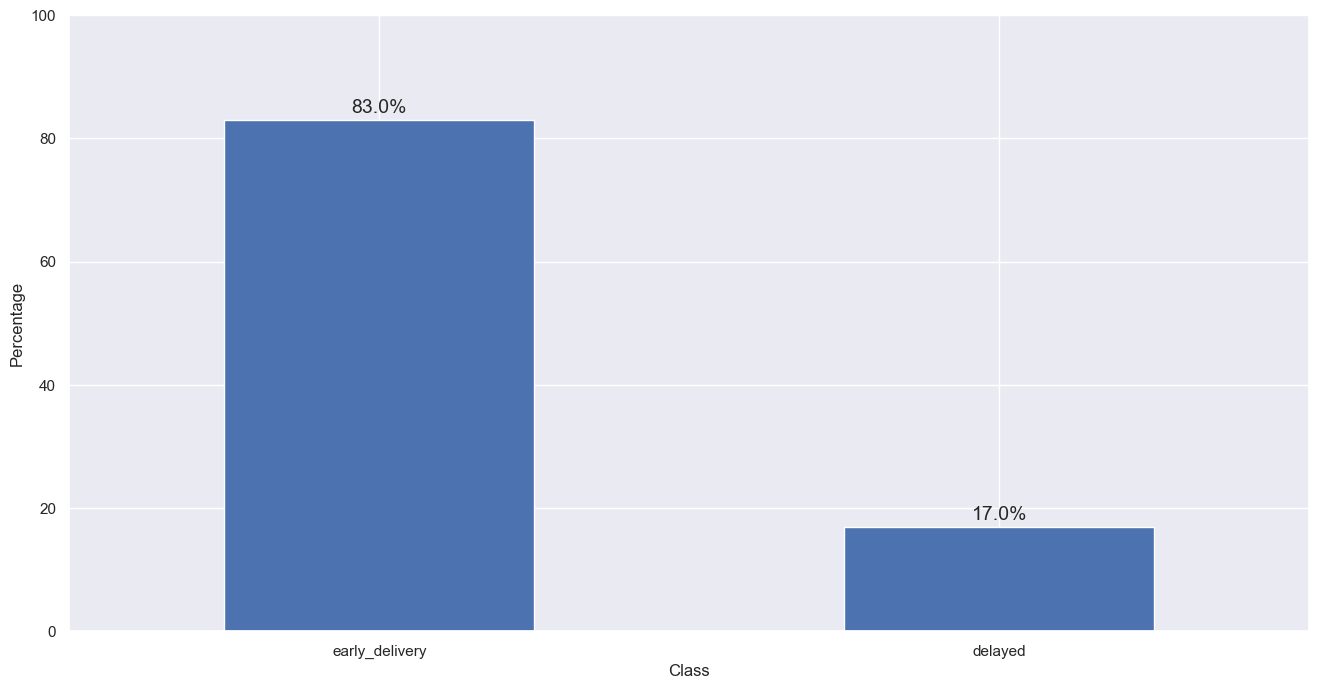

In [10]:
#To check our target variable
ax = df["delivery_status"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
# Add x and y axis titles
ax.set_xlabel("Class")
ax.set_ylabel("Percentage")
ax.set_ylim(0,100)
plt.savefig("Imbalanced.png")

# Remove y axis
#ax.get_yaxis().set_visible(False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4005 non-null   object 
 1   manager                   4005 non-null   object 
 2   delivery_method           4005 non-null   object 
 3   vendor_terms              4005 non-null   object 
 4   transport_mode            4005 non-null   object 
 5   order_date                4005 non-null   object 
 6   expected_date             4005 non-null   object 
 7   actual_date               4005 non-null   object 
 8   recorded_date             4005 non-null   object 
 9   product_category          4005 non-null   object 
 10  product_type              4005 non-null   object 
 11  supplier                  4005 non-null   object 
 12  product_feature           4005 non-null   object 
 13  product_name              4005 non-null   object 
 14  product_

In [12]:
df.head()

country   manager delivery_method vendor_terms transport_mode  order_date  \
0    Kenya  PMO - US     Direct Drop          EXW            Air  2010-09-27   
1    Kenya  PMO - US     Direct Drop          EXW            Air  2012-06-05   
2    Kenya  PMO - US     Direct Drop          EXW            Air  2010-09-27   
3    Kenya  PMO - US     Direct Drop          EXW            Air  2009-11-18   
4  Nigeria  PMO - US     Direct Drop          CIP            Air  2009-05-08   

  expected_date actual_date recorded_date product_category product_type  \
0    2011-02-10  2011-02-10    2011-02-10             HRDT     HIV test   
1    2012-07-09  2012-07-09    2012-07-09             HRDT     HIV test   
2    2011-02-10  2011-02-10    2011-02-10             HRDT     HIV test   
3    2010-02-16  2010-02-19    2010-02-19             HRDT     HIV test   
4    2009-09-23  2009-09-23    2009-09-23             HRDT     HIV test   

                                       supplier  \
0                                 Orgenics, Ltd   
1                                 Orgenics, Ltd   
2                                 Orgenics, Ltd   
3                                 Orgenics, Ltd   
4  BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)   

                                  product_feature  \
0  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
1  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
4         HIV 2, New LAV Blot 2 HIV Kit, 18 Tests   

                          product_name product_brand dosage dosage_form  \
0  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
1  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
2  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
3  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
4        HIV 2, New LAV Blot 2 HIV Kit           LAV  150mg    Test kit   

   units_per_pack  total_quantity  total_value  pack_price  unit_price  \
0             100               1        89.00       89.00        0.89   
1             100               1        89.00       89.00        0.89   
2             100               1        89.00       89.00        0.89   
3             100               1        80.00       80.00        0.80   
4              18               1       750.29      750.29       41.68   

          factory_location  priority_status  total_weight  shipping_cost  \
0          Inverness Japan             True        1370.0       14515.01   
1  Alere Medical Co., Ltd.             True         985.0       11034.01   
2          Inverness Japan             True         800.0        8826.00   
3          Inverness Japan             True        1028.0       10083.69   
4     Bio-Rad Laboratories             True          18.0           0.00   

   insurance_cost continent  quantity% delivery_status  \
0            0.19    Africa        0.0  early_delivery   
1            0.12    Africa        0.0  early_delivery   
2            0.19    Africa        0.0  early_delivery   
3            0.17    Africa        0.0         delayed   
4            1.47    Africa        0.0  early_delivery   

   shipping_cost_per_weight  item_quantity(%)  
0                 10.594898               0.0  
1                 11.202041               0.0  
2                 11.032500               0.0  
3                  9.809037               0.0  
4                  0.000000               0.0

In [13]:
df.nunique()

country                       31
manager                        1
delivery_method                2
vendor_terms                   8
transport_mode                 4
order_date                   626
expected_date               1190
actual_date                 1281
recorded_date               1234
product_category               4
product_type                   6
supplier                      37
product_feature              126
product_name                  64
product_brand                 35
dosage                        44
dosage_form                   14
units_per_pack                25
total_quantity              2748
total_value                 3610
pack_price                   466
unit_price                   112
factory_location              50
priority_status                1
total_weight                2642
shipping_cost               3272
insurance_cost              3492
continent                      1
quantity%                    146
delivery_status                2
shipping_c

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['units_per_pack',
 'total_quantity',
 'total_value',
 'pack_price',
 'unit_price',
 'total_weight',
 'shipping_cost',
 'insurance_cost',
 'quantity%',
 'shipping_cost_per_weight',
 'item_quantity(%)']

In [15]:
from sklearn.preprocessing import MinMaxScaler

def minmax_scale_and_merge(df, numerical_cols):
    scaled_df = df.copy()

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Scale numerical columns
    scaled_values = scaler.fit_transform(df[numerical_cols])

    # Create a DataFrame from the scaled values
    scaled_df[numerical_cols] = scaled_values

    return scaled_df

In [16]:
df = minmax_scale_and_merge(df, numerical_cols)

In [17]:
# Identify the target variable column
target_column = 'delivery_status'

# Identify categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

# Remove the target variable from the categorical columns list
categorical_columns = [col for col in categorical_columns if col != target_column]

In [18]:
# Separate the target column from the rest of the DataFrame
df_target = df[target_column]  # Store the target column
df_features = df.drop(columns=[target_column])  # DataFrame without the target column

In [19]:
for col in categorical_columns:
    encode_quantity = df_features.groupby(col)['total_quantity'].mean().sort_values(ascending=True)
    df_features[col + '_encoded'] = df_features[col].map(encode_quantity)


# Drop the original categorical variables
df_features.drop(categorical_columns, axis=1, inplace=True)

In [20]:
# Concatenate the target column back to the features DataFrame
df_transformed = pd.concat([df_features, df_target], axis=1)

# Display the first few rows of the transformed dataframe
df_transformed.head()

units_per_pack  total_quantity  total_value  pack_price  unit_price  \
0        0.099099             0.0     0.000015    0.071200    0.021353   
1        0.099099             0.0     0.000015    0.071200    0.021353   
2        0.099099             0.0     0.000015    0.071200    0.021353   
3        0.099099             0.0     0.000013    0.064000    0.019194   
4        0.017017             0.0     0.000126    0.600232    1.000000   

   priority_status  total_weight  shipping_cost  insurance_cost  quantity%  \
0             True      0.008845       0.050112        0.000027        0.0   
1             True      0.006357       0.038094        0.000017        0.0   
2             True      0.005162       0.030471        0.000027        0.0   
3             True      0.006635       0.034813        0.000024        0.0   
4             True      0.000110       0.000000        0.000210        0.0   

   shipping_cost_per_weight  item_quantity(%)  country_encoded  \
0                  0.000341               0.0         0.009466   
1                  0.000360               0.0         0.009466   
2                  0.000355               0.0         0.009466   
3                  0.000316               0.0         0.009466   
4                  0.000000               0.0         0.056804   

   manager_encoded  delivery_method_encoded  vendor_terms_encoded  \
0         0.044551                 0.032463              0.020568   
1         0.044551                 0.032463              0.020568   
2         0.044551                 0.032463              0.020568   
3         0.044551                 0.032463              0.020568   
4         0.044551                 0.032463              0.020710   

   transport_mode_encoded  order_date_encoded  expected_date_encoded  \
0                0.019513            0.006450               0.005410   
1                0.019513            0.005401               0.005927   
2                0.019513            0.006450               0.005410   
3                0.019513            0.006719               0.006930   
4                0.019513            0.000000               0.000000   

   actual_date_encoded  recorded_date_encoded  product_category_encoded  \
0             0.005410               0.005410                  0.004845   
1             0.083686               0.083686                  0.004845   
2             0.005410               0.005410                  0.004845   
3             0.006882               0.006882                  0.004845   
4             0.000000               0.000000                  0.004845   

   product_type_encoded  supplier_encoded  product_feature_encoded  \
0              0.005021          0.005011                 0.005366   
1              0.005021          0.005011                 0.005366   
2              0.005021          0.005011                 0.005366   
3              0.005021          0.005011                 0.005366   
4              0.005021          0.000000                 0.000000   

   product_name_encoded  product_brand_encoded  dosage_encoded  \
0              0.005366               0.005081         0.05235   
1              0.005366               0.005081         0.05235   
2              0.005366               0.005081         0.05235   
3              0.005366               0.005081         0.05235   
4              0.000000               0.000000         0.05235   

   dosage_form_encoded  factory_location_encoded  continent_encoded  \
0             0.005021                  0.004840           0.044551   
1             0.005021                  0.005144           0.044551   
2             0.005021                  0.004840           0.044551   
3             0.005021                  0.004840           0.044551   
4             0.005021                  0.000546           0.044551   

  delivery_status  
0  early_delivery  
1  early_delivery  
2  early_delivery  
3         delayed  
4  early_delivery

In [21]:
df = df_transformed

In [22]:
df.nunique()

units_per_pack                25
total_quantity              2748
total_value                 3610
pack_price                   466
unit_price                   112
priority_status                1
total_weight                2642
shipping_cost               3272
insurance_cost              3492
quantity%                    146
shipping_cost_per_weight    3827
item_quantity(%)              37
country_encoded               31
manager_encoded                1
delivery_method_encoded        2
vendor_terms_encoded           8
transport_mode_encoded         4
order_date_encoded           597
expected_date_encoded       1093
actual_date_encoded         1216
recorded_date_encoded       1167
product_category_encoded       4
product_type_encoded           6
supplier_encoded              37
product_feature_encoded      125
product_name_encoded          63
product_brand_encoded         35
dosage_encoded                44
dosage_form_encoded           14
factory_location_encoded      50
continent_

In [23]:
df.shape

(4005, 32)

In [24]:
# Define the dictionary mapping
status_mapping = {'early_delivery': 1, 'delayed': 0}

# Map the  column using the defined dictionary
df["delivery_status"] = df["delivery_status"].map(status_mapping)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   units_per_pack            4005 non-null   float64
 1   total_quantity            4005 non-null   float64
 2   total_value               4005 non-null   float64
 3   pack_price                4005 non-null   float64
 4   unit_price                4005 non-null   float64
 5   priority_status           4005 non-null   bool   
 6   total_weight              4005 non-null   float64
 7   shipping_cost             4005 non-null   float64
 8   insurance_cost            4005 non-null   float64
 9   quantity%                 4005 non-null   float64
 10  shipping_cost_per_weight  4005 non-null   float64
 11  item_quantity(%)          4005 non-null   float64
 12  country_encoded           4005 non-null   float64
 13  manager_encoded           4005 non-null   float64
 14  delivery

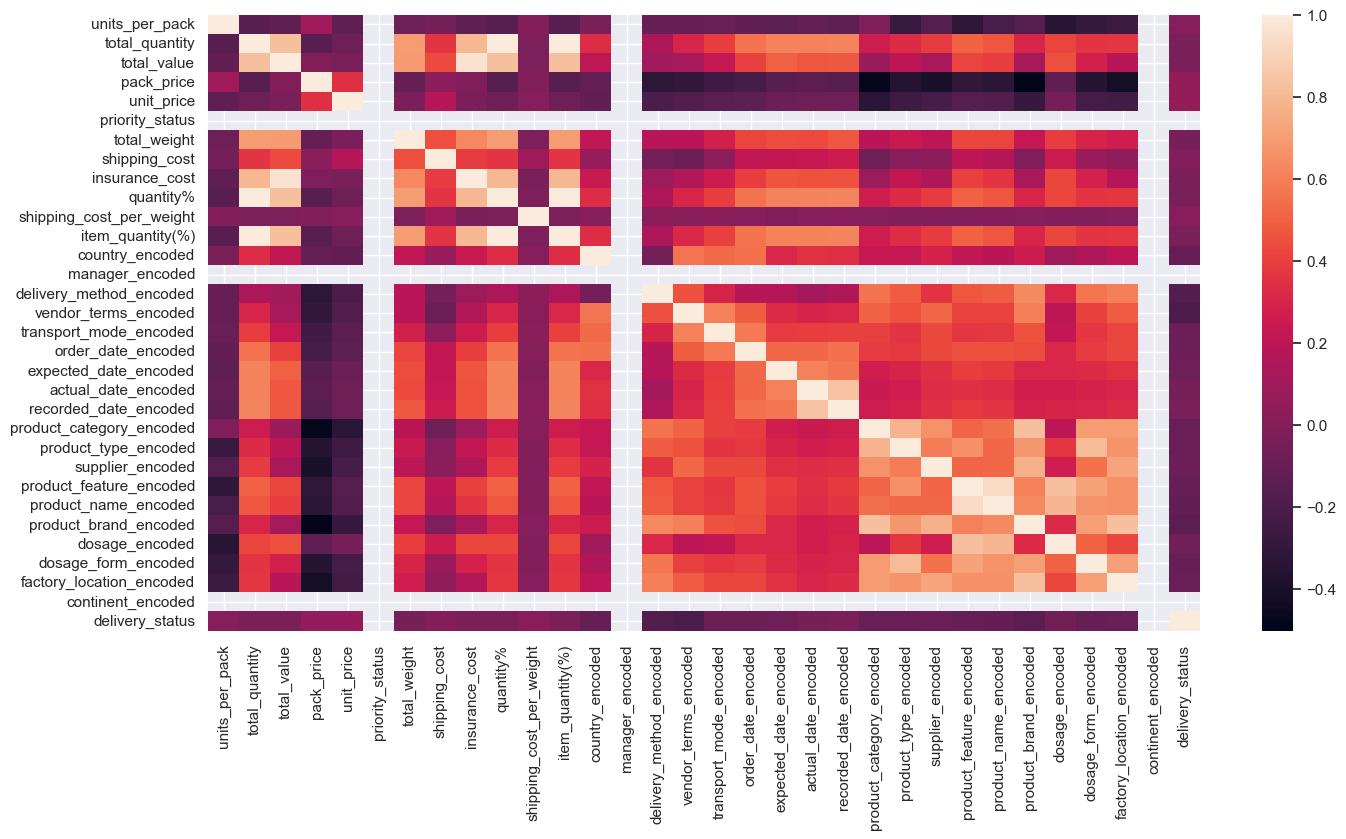

In [26]:
# Checking for multicolinearity amongst columns
corr = df.corr()
sns.heatmap(corr, fmt = '.2f');

In [27]:
df.drop(columns=['expected_date_encoded', 'actual_date_encoded', 'recorded_date_encoded', 'item_quantity(%)', 'priority_status', 'product_feature_encoded', 'order_date_encoded', 'continent_encoded', 'manager_encoded', 'quantity%'], inplace=True)
df.head()

units_per_pack  total_quantity  total_value  pack_price  unit_price  \
0        0.099099             0.0     0.000015    0.071200    0.021353   
1        0.099099             0.0     0.000015    0.071200    0.021353   
2        0.099099             0.0     0.000015    0.071200    0.021353   
3        0.099099             0.0     0.000013    0.064000    0.019194   
4        0.017017             0.0     0.000126    0.600232    1.000000   

   total_weight  shipping_cost  insurance_cost  shipping_cost_per_weight  \
0      0.008845       0.050112        0.000027                  0.000341   
1      0.006357       0.038094        0.000017                  0.000360   
2      0.005162       0.030471        0.000027                  0.000355   
3      0.006635       0.034813        0.000024                  0.000316   
4      0.000110       0.000000        0.000210                  0.000000   

   country_encoded  delivery_method_encoded  vendor_terms_encoded  \
0         0.009466                 0.032463              0.020568   
1         0.009466                 0.032463              0.020568   
2         0.009466                 0.032463              0.020568   
3         0.009466                 0.032463              0.020568   
4         0.056804                 0.032463              0.020710   

   transport_mode_encoded  product_category_encoded  product_type_encoded  \
0                0.019513                  0.004845              0.005021   
1                0.019513                  0.004845              0.005021   
2                0.019513                  0.004845              0.005021   
3                0.019513                  0.004845              0.005021   
4                0.019513                  0.004845              0.005021   

   supplier_encoded  product_name_encoded  product_brand_encoded  \
0          0.005011              0.005366               0.005081   
1          0.005011              0.005366               0.005081   
2          0.005011              0.005366               0.005081   
3          0.005011              0.005366               0.005081   
4          0.000000              0.000000               0.000000   

   dosage_encoded  dosage_form_encoded  factory_location_encoded  \
0         0.05235             0.005021                  0.004840   
1         0.05235             0.005021                  0.005144   
2         0.05235             0.005021                  0.004840   
3         0.05235             0.005021                  0.004840   
4         0.05235             0.005021                  0.000546   

   delivery_status  
0                1  
1                1  
2                1  
3                0  
4                1

In [28]:
df.nunique()

units_per_pack                25
total_quantity              2748
total_value                 3610
pack_price                   466
unit_price                   112
total_weight                2642
shipping_cost               3272
insurance_cost              3492
shipping_cost_per_weight    3827
country_encoded               31
delivery_method_encoded        2
vendor_terms_encoded           8
transport_mode_encoded         4
product_category_encoded       4
product_type_encoded           6
supplier_encoded              37
product_name_encoded          63
product_brand_encoded         35
dosage_encoded                44
dosage_form_encoded           14
factory_location_encoded      50
delivery_status                2
dtype: int64

In [29]:
df.shape

(4005, 22)

In [30]:
# Splitting features and Target
X = df.drop(columns=['delivery_status'], axis='columns') 
y = df['delivery_status']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, stratify=y,  random_state=101)

# Model Training and Evaluation

In [32]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_fscore_support, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,  AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [33]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, manual_threshold):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Convert probabilities to binary predictions based on the manual threshold
    y_pred = (y_prob > manual_threshold).astype(int)
    
    # Evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    precision, recall, f1_minority, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    

    # Overall F1-score
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation summary
    print(f"Model: {model_name}")
    print(f"ROC AUC: {roc_auc:.4f}" if y_prob is not None else "ROC AUC: Not available")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    # print(conf_matrix)

    # Plotting ROC AUC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend()
        plt.savefig(f'{model_name}_roc_curve.png')  
        plt.show()
    
    # Plotting confusion matrix
    # Define custom labels for the confusion matrix
    custom_labels = ['Delayed Delivery', 'Early Delivery']
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=2, xticklabels=custom_labels, yticklabels=custom_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.savefig(f'{model_name}_confusion_matrix.png')  # Save the confusion matrix as a PNG file
    plt.show()

    # Plotting feature importance (if applicable)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        features = X_train.columns
        
        # Sort features by importance
        sorted_idx = np.argsort(feature_importance)
        
        plt.figure()
        plt.barh(features[sorted_idx], feature_importance[sorted_idx], color='darkblue')
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance for {model_name}')
        plt.savefig(f'{model_name}_feature_importance.png')
        plt.show()
    
    # Return results in a dictionary
    return {
        'model': model_name,
        'balanced_accuracy': balanced_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': conf_matrix
  }

In [34]:
# from ipywidgets import interact
# from sklearn.metrics import (
#     confusion_matrix, roc_auc_score, precision_recall_fscore_support, 
#     accuracy_score, balanced_accuracy_score, classification_report
# )
# import seaborn as sns
# import matplotlib.pyplot as plt

# def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
#     # Fit the model
#     model.fit(X_train, y_train)
    
#     # Predictions
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
#     # Initialize variables to store results
#     results = {
#         'precision': None,
#         'recall': None,
#         'f1_score': None,
#         'roc_auc': None,
#         'confusion_matrix': None,
#         'accuracy': None,
#         'balanced_accuracy': None
#     }
    
#     # Define evaluation function
#     def evaluate_threshold(threshold=0.5):
#         # Convert probabilities to binary predictions based on the threshold
#         y_pred_threshold = (y_prob > threshold).astype(int)

#         # Calculate evaluation metrics
#         conf_matrix = confusion_matrix(y_test, y_pred_threshold)
#         roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
#         precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_threshold, average='binary')
#         accuracy = accuracy_score(y_test, y_pred_threshold)
#         balanced_accuracy = balanced_accuracy_score(y_test, y_pred_threshold)
        
#         # Store results in the dictionary
#         results.update({
#             'precision': precision,
#             'recall': recall,
#             'f1_score': f1,
#             'roc_auc': roc_auc,
#             'confusion_matrix': conf_matrix,
#             'accuracy': accuracy,
#             'balanced_accuracy': balanced_accuracy
#         })

#         # Print evaluation summary
#         print(f"Model: {model_name}")
#         print(f"Threshold: {threshold:.2f}")
#         print(f"ROC AUC: {roc_auc:.4f}" if y_prob is not None else "ROC AUC: Not available")
#         print(f"Accuracy: {accuracy:.4f}")
#         print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
#         print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
#         print(f"F1-Score: {f1:.4f}")
#         print(classification_report(y_test, y_pred_threshold))

#         # Plotting confusion matrix
#         custom_labels = ['Delayed Delivery', 'Early Delivery']
#         plt.figure(figsize=(6, 4))
#         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=2, linecolor='black', xticklabels=custom_labels, yticklabels=custom_labels)
#         plt.title(f'Confusion Matrix for {model_name}')
#         plt.xlabel('Predicted Class')
#         plt.ylabel('True Class')
#         plt.show()
    
#     # Interactive threshold adjustment
#     interact(evaluate_threshold, threshold=(0.0, 1.0, 0.05))

#     # Evaluate with default threshold
#     evaluate_threshold(0.5)

#     # Return results dictionary
#     return results

Model: Logistic Regression
ROC AUC: 0.6452
Balanced Accuracy: 0.6144
Precision: 0.8982, Recall: 0.5130, F1-Score: 0.6531
              precision    recall  f1-score   support

           0       0.23      0.72      0.35       204
           1       0.90      0.51      0.65       998

    accuracy                           0.55      1202
   macro avg       0.56      0.61      0.50      1202
weighted avg       0.79      0.55      0.60      1202



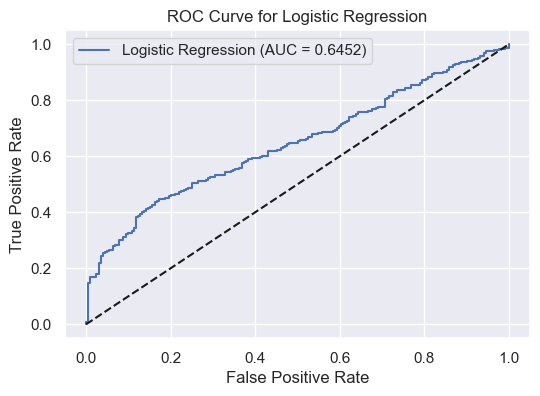

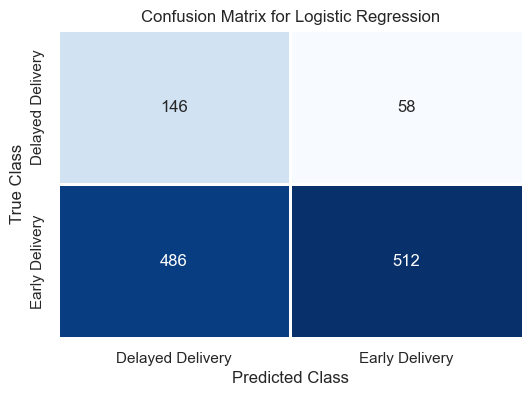

In [35]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_result = evaluate_model(lr_model, 'Logistic Regression', X_train, X_test, y_train, y_test, manual_threshold=0.5)

Model: Random Forest
ROC AUC: 0.7676
Balanced Accuracy: 0.7061
Precision: 0.9300, Recall: 0.6523, F1-Score: 0.7668
              precision    recall  f1-score   support

           0       0.31      0.76      0.44       204
           1       0.93      0.65      0.77       998

    accuracy                           0.67      1202
   macro avg       0.62      0.71      0.60      1202
weighted avg       0.82      0.67      0.71      1202



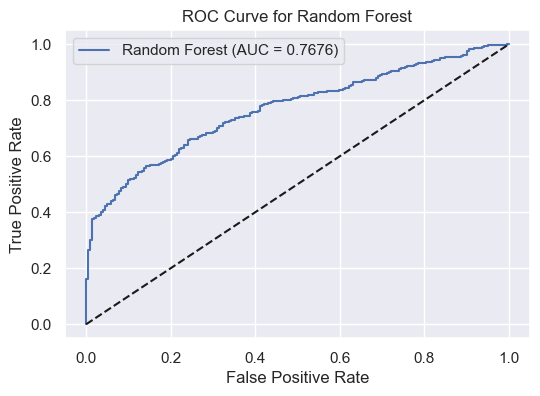

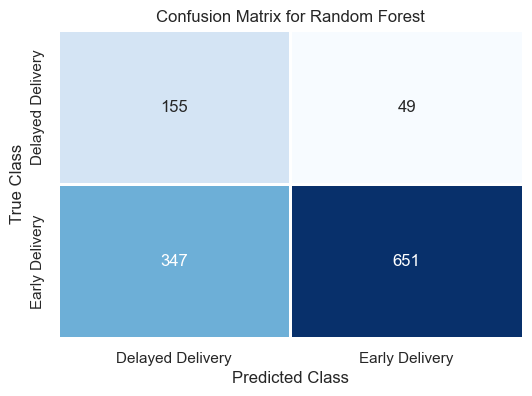

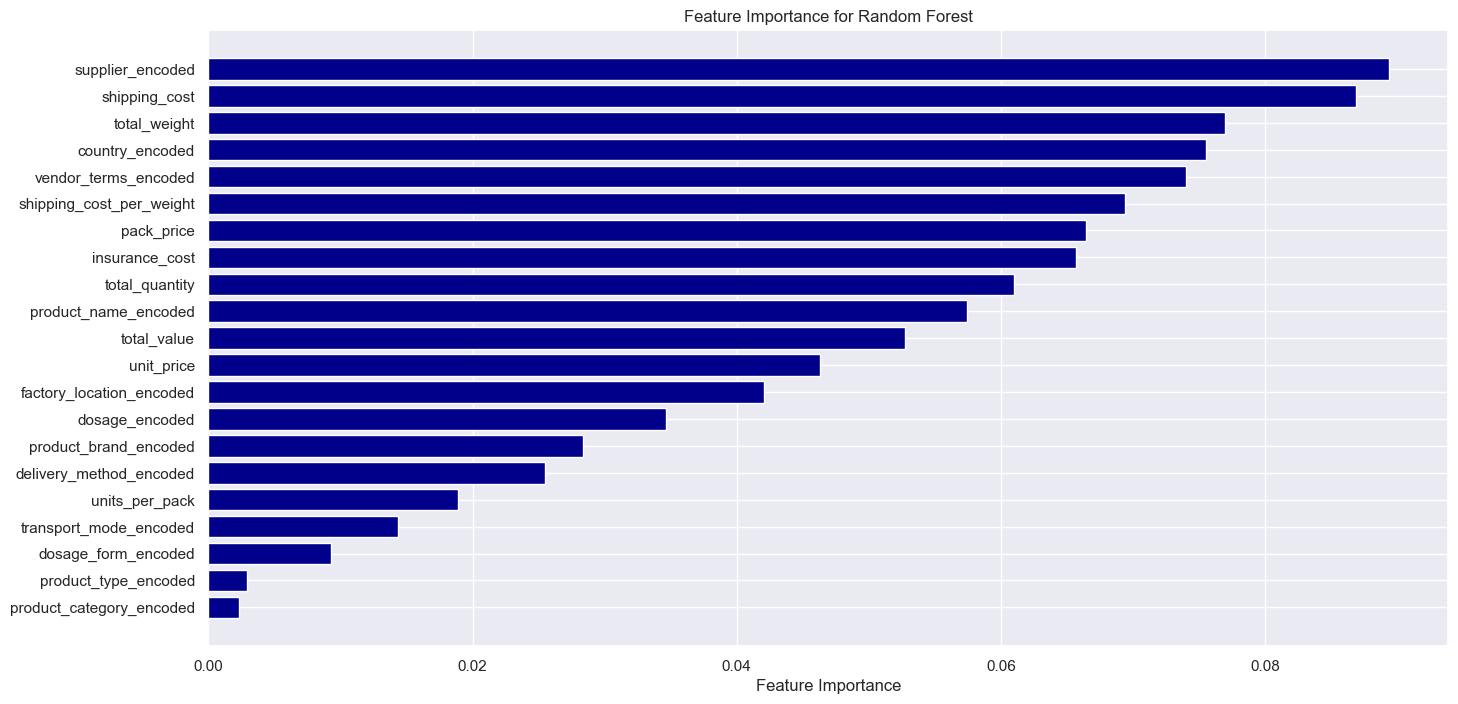

In [36]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42, max_depth=8, class_weight='balanced')
rf_result = evaluate_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test, manual_threshold=0.5)

Model: SVM
ROC AUC: 0.7203
Balanced Accuracy: 0.6560
Precision: 0.9183, Recall: 0.5521, F1-Score: 0.6896
              precision    recall  f1-score   support

           0       0.26      0.76      0.38       204
           1       0.92      0.55      0.69       998

    accuracy                           0.59      1202
   macro avg       0.59      0.66      0.54      1202
weighted avg       0.81      0.59      0.64      1202



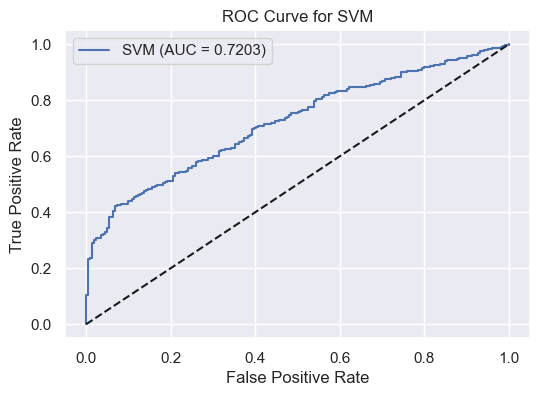

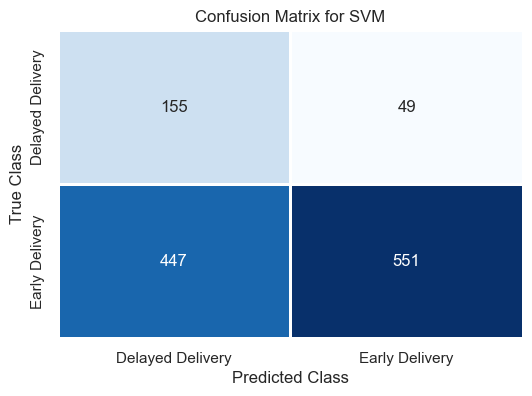

In [37]:
svm_model = SVC(probability=True, random_state=101, class_weight='balanced')
svm_result = evaluate_model(svm_model, 'SVM', X_train, X_test, y_train, y_test, manual_threshold=0.8)

Model: XGBoost
ROC AUC: 0.7636
Balanced Accuracy: 0.6772
Precision: 0.9075, Recall: 0.7074, F1-Score: 0.7950
              precision    recall  f1-score   support

           0       0.31      0.65      0.42       204
           1       0.91      0.71      0.80       998

    accuracy                           0.70      1202
   macro avg       0.61      0.68      0.61      1202
weighted avg       0.81      0.70      0.73      1202



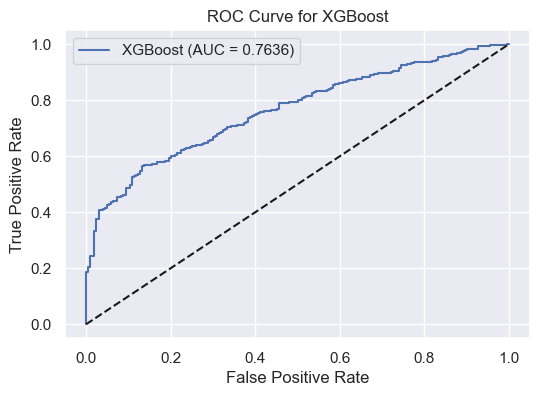

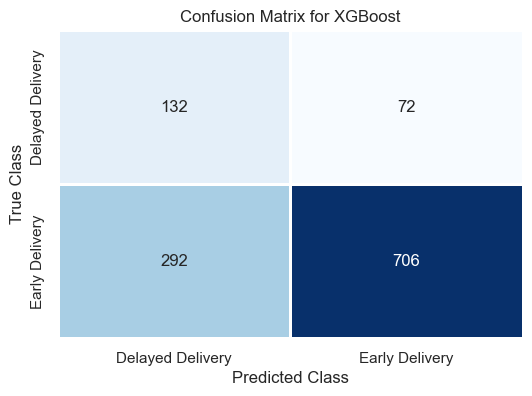

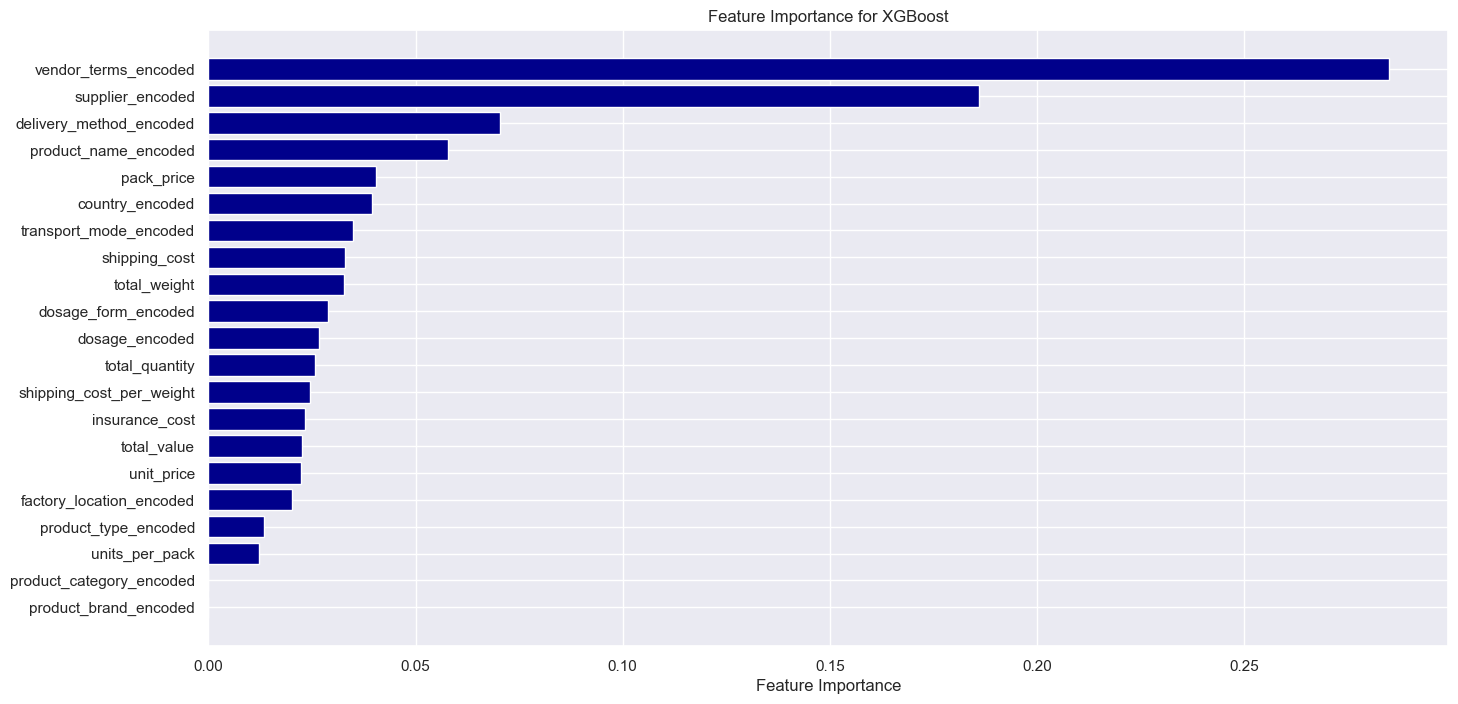

In [38]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_result = evaluate_model(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test, manual_threshold=0.75)

Model: LightGBM
ROC AUC: 0.7718
Balanced Accuracy: 0.6859
Precision: 0.9138, Recall: 0.6904, F1-Score: 0.7865
              precision    recall  f1-score   support

           0       0.31      0.68      0.43       204
           1       0.91      0.69      0.79       998

    accuracy                           0.69      1202
   macro avg       0.61      0.69      0.61      1202
weighted avg       0.81      0.69      0.73      1202



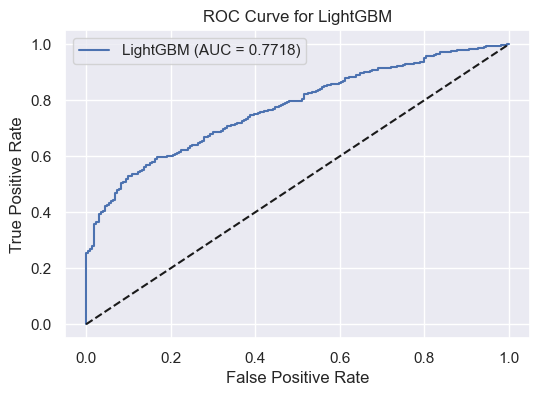

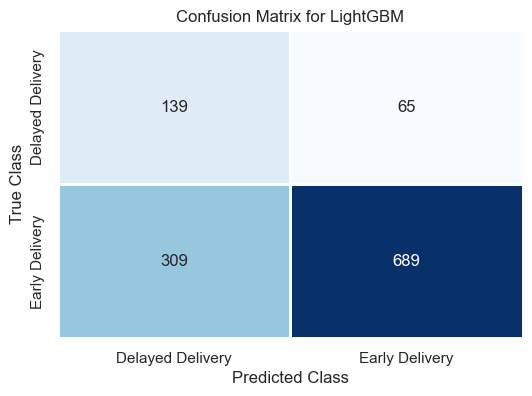

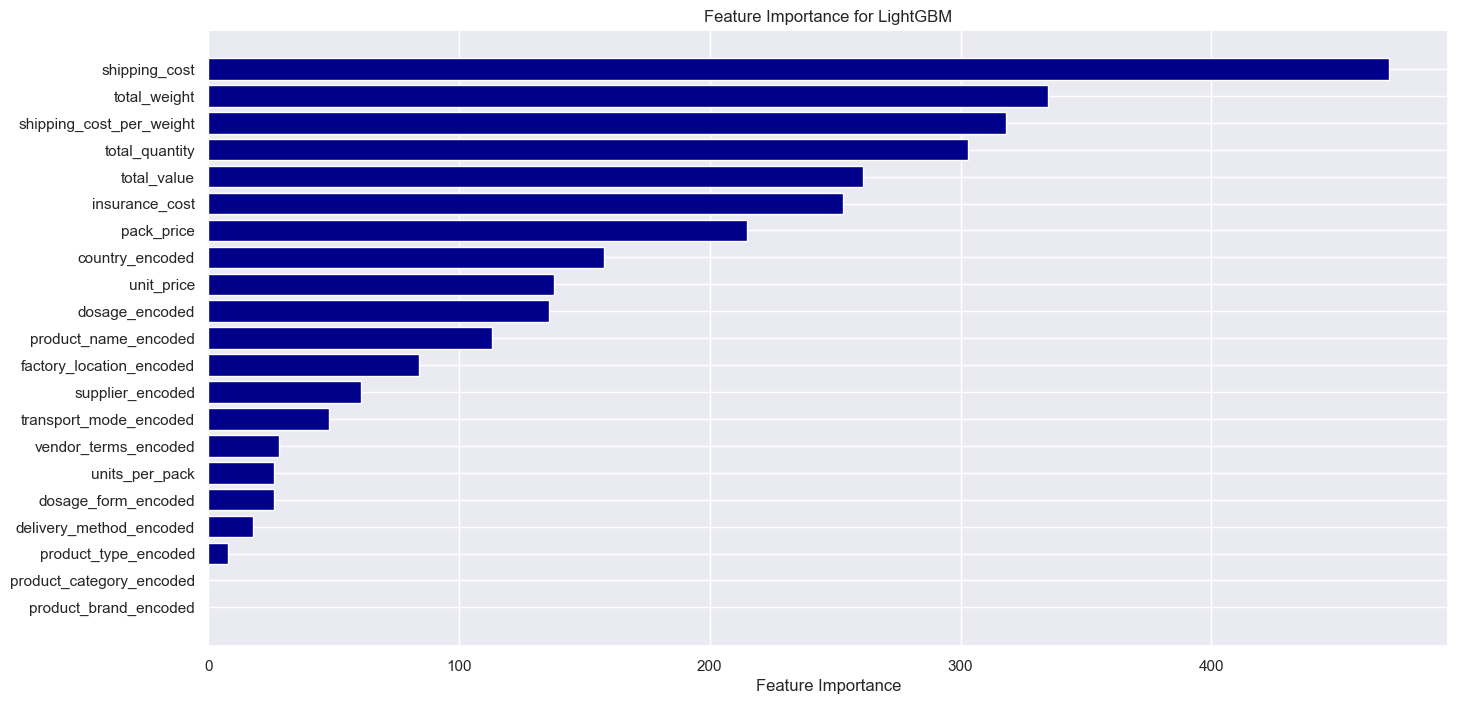

In [39]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(random_state=42, verbose = -1, class_weight='balanced')
lgb_result = evaluate_model(lgb_model, 'LightGBM', X_train, X_test, y_train, y_test, manual_threshold=0.7)

Model: CatBoost
ROC AUC: 0.7738
Balanced Accuracy: 0.7143
Precision: 0.9360, Recall: 0.6443, F1-Score: 0.7632
              precision    recall  f1-score   support

           0       0.31      0.78      0.45       204
           1       0.94      0.64      0.76       998

    accuracy                           0.67      1202
   macro avg       0.62      0.71      0.60      1202
weighted avg       0.83      0.67      0.71      1202



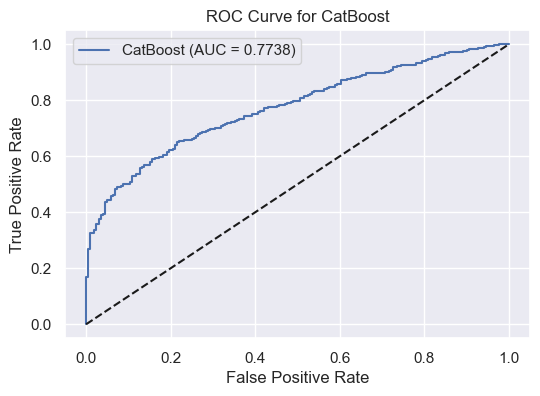

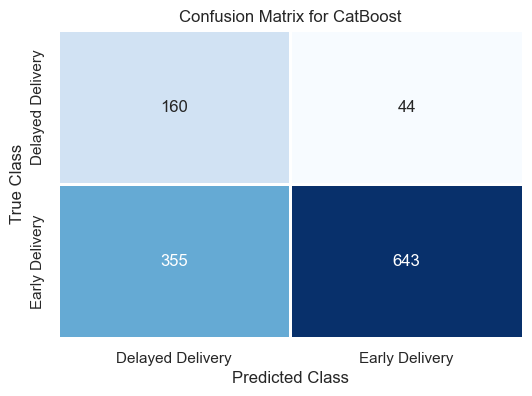

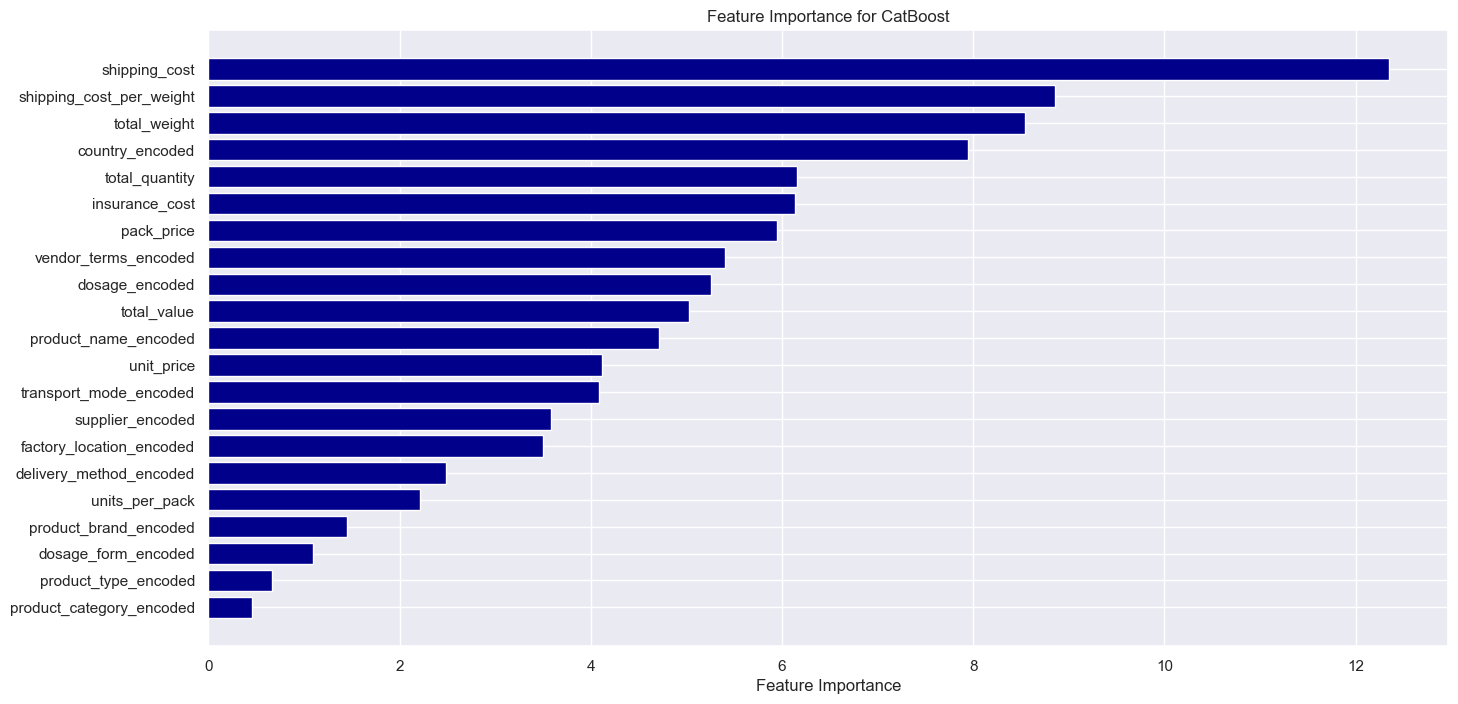

In [40]:
from catboost import CatBoostClassifier

# Calculate class weights based on the proportions in the training set
class_weight = {
    0: len(y_train) / (2 * sum(y_train == 0)),
    1: len(y_train) / (2 * sum(y_train == 1))
}

# Initialize CatBoost model with class weights and other parameters
cb_model = CatBoostClassifier(random_state=42, class_weights=class_weight, verbose=False)

# Evaluate the model using the evaluate_model function
cb_result = evaluate_model(cb_model, 'CatBoost', X_train, X_test, y_train, y_test, manual_threshold=0.65)

Model: Decision Tree
ROC AUC: 0.7206
Balanced Accuracy: 0.6848
Precision: 0.9380, Recall: 0.5461, F1-Score: 0.6903
              precision    recall  f1-score   support

           0       0.27      0.82      0.41       204
           1       0.94      0.55      0.69       998

    accuracy                           0.59      1202
   macro avg       0.60      0.68      0.55      1202
weighted avg       0.82      0.59      0.64      1202



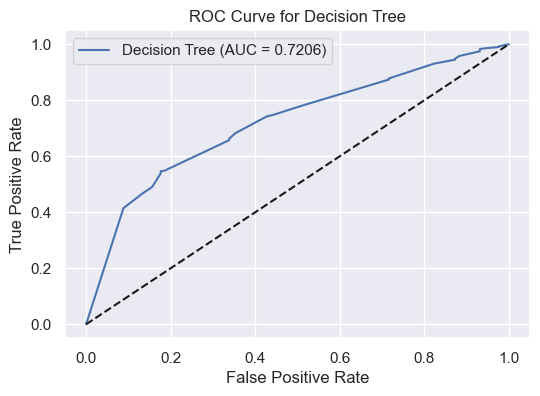

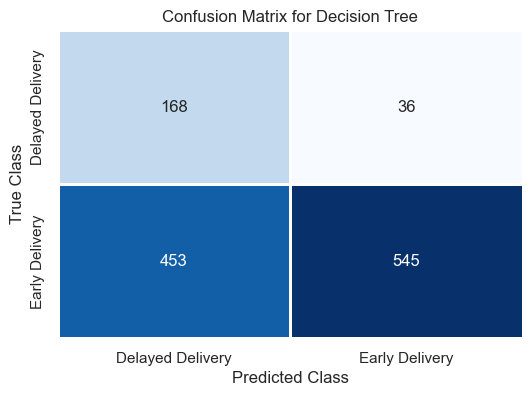

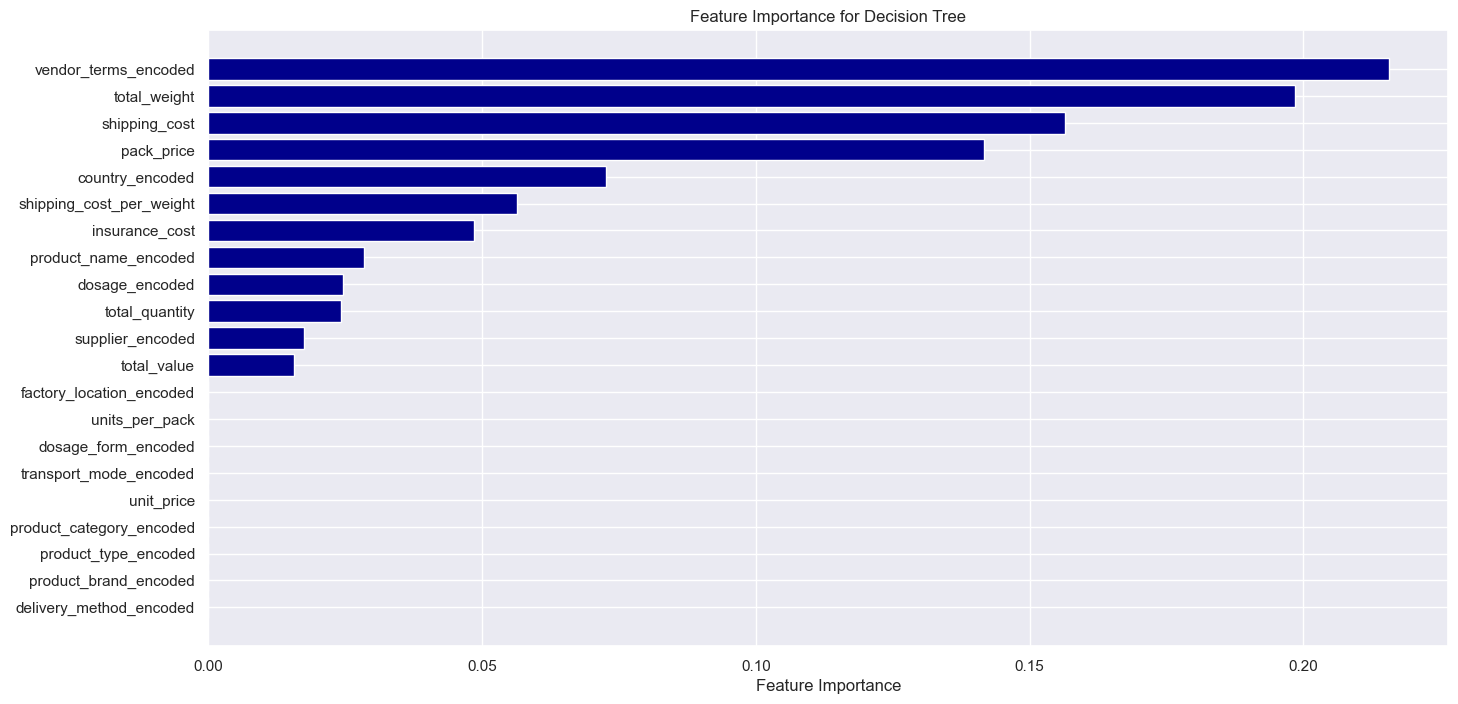

In [41]:
# Initialize the Decision Tree model with class_weight='balanced' to address the class imbalance
dt_model = DecisionTreeClassifier(random_state=42, max_depth=7,  class_weight='balanced')

# Evaluate the model
dt_result = evaluate_model(dt_model, 'Decision Tree', X_train, X_test, y_train, y_test, manual_threshold=0.6)

In [42]:
# Combine the results into a DataFrame
# Collect all results from different models
all_results = [lr_result, rf_result, svm_result, xgb_result, lgb_result, cb_result, dt_result]

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(all_results)

# Display the DataFrame
#print(results_df)
results_df.drop("confusion_matrix", axis =1, inplace=True)
results_df.round(2).sort_values(by=['f1_score', 'balanced_accuracy'], ascending=[False, False])

model  balanced_accuracy  precision  recall  f1_score  \
3              XGBoost               0.68       0.91    0.71      0.80   
4             LightGBM               0.69       0.91    0.69      0.79   
1        Random Forest               0.71       0.93    0.65      0.77   
5             CatBoost               0.71       0.94    0.64      0.76   
6        Decision Tree               0.68       0.94    0.55      0.69   
2                  SVM               0.66       0.92    0.55      0.69   
0  Logistic Regression               0.61       0.90    0.51      0.65   

   roc_auc  
3     0.76  
4     0.77  
1     0.77  
5     0.77  
6     0.72  
2     0.72  
0     0.65

# Random Forest

In [43]:
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_fscore_support, accuracy_score, balanced_accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV

In [44]:
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold=0.5):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else np.zeros_like(y_test)
    
    # Binarize predictions based on the threshold
    y_pred_binary = (y_prob > threshold).astype(int)
    
    # Evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_prob)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_binary, average='binary')
    accuracy = accuracy_score(y_test, y_pred_binary)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
    
    # Print evaluation summary
    print(f"Threshold: {threshold:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred_binary))
    print(conf_matrix)
    
    return threshold

In [45]:
# Define the parameter distributions for Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf, cv=4, scoring='f1', n_iter=50, random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Score for Random Forest:", random_search_rf.best_score_)

# Retrieve the best parameters
best_params_rf = random_search_rf.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_rf)

# Evaluate the model with the optimal threshold focusing on F1 score
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test, threshold=0.5)

Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8}
Best Score for Random Forest: 0.7684109157411023
Threshold: 0.5000
ROC AUC: 0.7705
Accuracy: 0.6606
Balanced Accuracy: 0.7039
Precision: 0.9313, Recall: 0.6383, F1-Score: 0.7574
              precision    recall  f1-score   support

           0       0.30      0.77      0.43       204
           1       0.93      0.64      0.76       998

    accuracy                           0.66      1202
   macro avg       0.62      0.70      0.60      1202
weighted avg       0.82      0.66      0.70      1202

[[157  47]
 [361 637]]


0.5

Features with importance >= median importance (0.0570):
                     Feature  Importance
3                 pack_price    0.056987
2                total_value    0.057630
7             insurance_cost    0.060560
1             total_quantity    0.065602
16      product_name_encoded    0.065844
9            country_encoded    0.067814
8   shipping_cost_per_weight    0.070833
5               total_weight    0.073698
11      vendor_terms_encoded    0.073801
15          supplier_encoded    0.081081
6              shipping_cost    0.085981


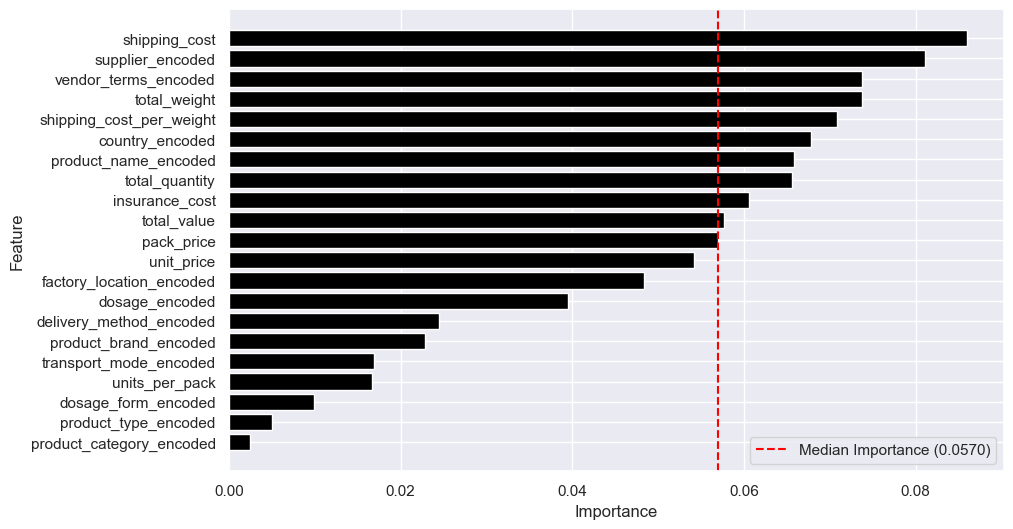

In [46]:
# Calculate the feature importances
importances = best_rf_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
# Assuming X_train is a pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importance in RandomForest Classifier")
plt.legend(loc='lower right')
plt.savefig("Feature Importance in RandomForest Classifier.png")

# LightGBM

In [47]:
# Define the parameter distributions for LightGBM
param_distributions_lgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [21, 31, 41],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_data_in_leaf': [1, 5, 10]
}

# Initialize the LightGBM model
lgb_model = LGBMClassifier(random_state=42, class_weight='balanced', verbose=1)

# Initialize RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_distributions_rf, cv=4, scoring='f1', n_iter=50, random_state=42)

# Fit the model
random_search_lgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_lgb.best_params_)
print("Best Score for Random Forest:", random_search_lgb.best_score_)

# Retrieve the best parameters
best_params_lgb = random_search_lgb.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_lgb_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_lgb)

# Evaluate the model with the optimal threshold focusing on F1 score
evaluate_model(best_lgb_model, X_train, X_test, y_train, y_test, threshold=0.55)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1745, number of negative: 357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the ov

0.55

Features with importance >= median importance (0.0534):
                     Feature  Importance
7             insurance_cost    0.053432
20  factory_location_encoded    0.053805
3                 pack_price    0.056567
1             total_quantity    0.058693
8   shipping_cost_per_weight    0.064470
5               total_weight    0.069963
9            country_encoded    0.072465
16      product_name_encoded    0.073772
6              shipping_cost    0.078405
11      vendor_terms_encoded    0.083517
15          supplier_encoded    0.093579


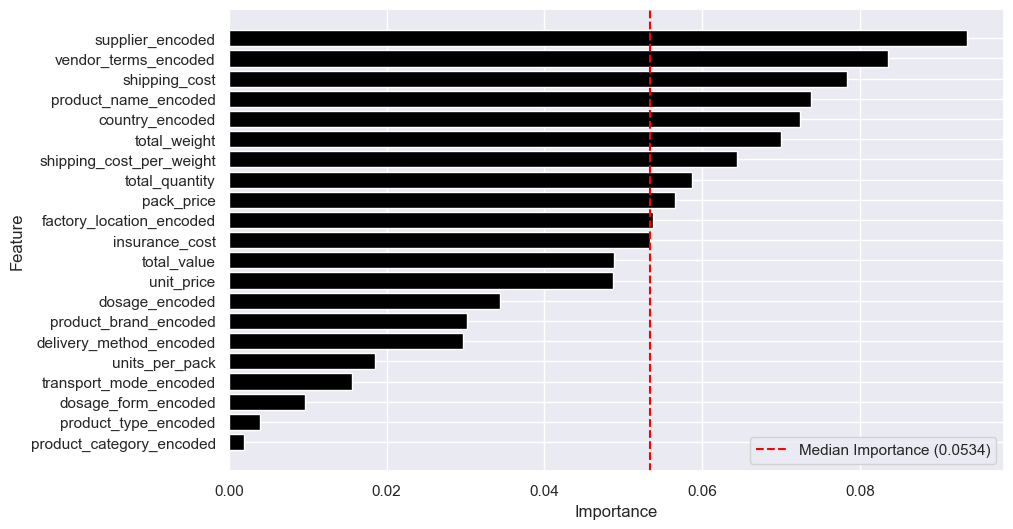

In [48]:
# Calculate the feature importances
importances = best_lgb_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
# Assuming X_train is a pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importance in Decision Tree")
plt.legend(loc='lower right')
plt.savefig("Feature Importance in LightGB.png")

# --------------------------------------------------------------------------------------------------------------

### XGBBoost

In [49]:
# Define the parameter distributions for XGBoost
param_distributions_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))


# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions_rf, cv=4, scoring='f1', n_iter=50, random_state=42, verbose=0)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_xgb.best_params_)
print("Best Score for Random Forest:", random_search_xgb.best_score_)

# Retrieve the best parameters
best_params_xgb = random_search_xgb.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_xgb_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_xgb)

# Evaluate the model with the optimal threshold focusing on F1 score
evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test, threshold=0.6)

[23:43:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:43:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:43:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:43:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:43:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:43:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_16754

0.6

Features with importance >= median importance (0.0570):
                     Feature  Importance
3                 pack_price    0.056987
2                total_value    0.057630
7             insurance_cost    0.060560
1             total_quantity    0.065602
16      product_name_encoded    0.065844
9            country_encoded    0.067814
8   shipping_cost_per_weight    0.070833
5               total_weight    0.073698
11      vendor_terms_encoded    0.073801
15          supplier_encoded    0.081081
6              shipping_cost    0.085981


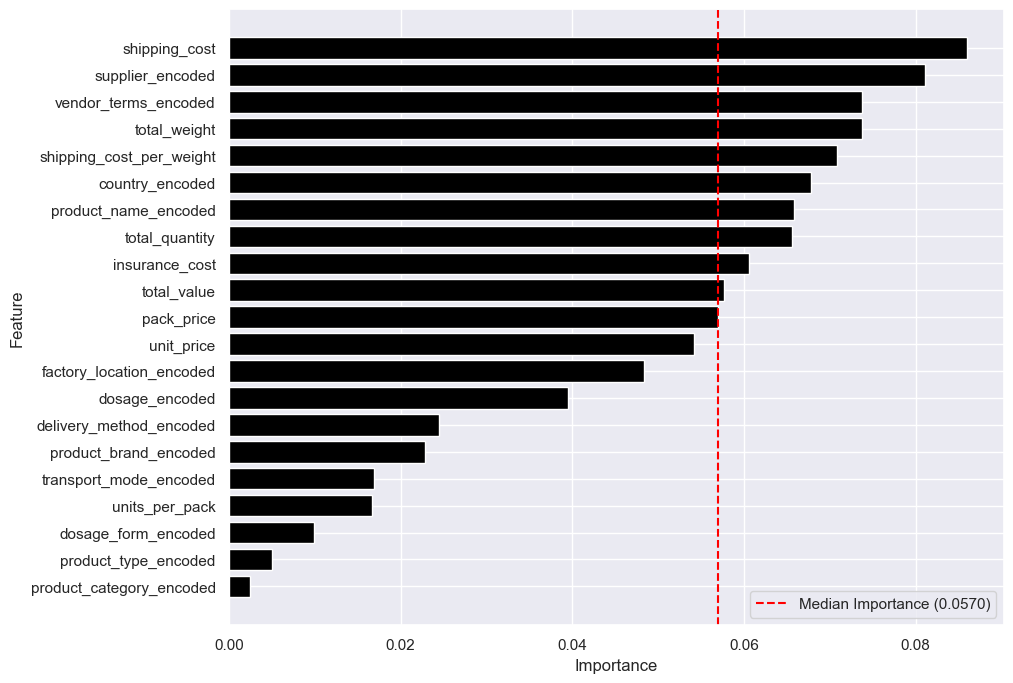

In [50]:
# Calculate the feature importances
importances = best_xgb_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
# Assuming X_train is a pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.title("Feature Importance in XGBoost")
plt.legend()
plt.savefig("Feature Importance in XGBoost.png")

#### Combining Our three top Models

In [51]:
# Calculate feature importances and filter features above median importance
def calculate_important_features(model, X_train):
    # Calculate the feature importances
    importances = model.feature_importances_

    # Calculate the median of the feature importance
    median_importance = np.median(importances)

    # Get the feature names
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns.tolist()
    else:
        feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Filter features with importance greater than or equal to the median
    important_features_df = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

    # Extract the list of important features
    important_features_list = important_features_df['Feature'].tolist()

    return important_features_list

In [52]:
# Calculate important features for Random Forest, SVM and CatBoosst
rf_important_features = calculate_important_features(best_rf_model, X_train)
lgb_important_features = calculate_important_features(best_lgb_model, X_train)
xgb_important_features = calculate_important_features(best_xgb_model, X_train)

# Find common features across the three lists
common_features = set(rf_important_features) & set(lgb_important_features) & set(xgb_important_features)

# Display the common features
print("Common features across Random Forest, Decision Tree, and CatBoost:")
print(common_features)

Common features across Random Forest, Decision Tree, and CatBoost:
{'supplier_encoded', 'total_quantity', 'total_weight', 'shipping_cost_per_weight', 'shipping_cost', 'product_name_encoded', 'pack_price', 'insurance_cost', 'country_encoded', 'vendor_terms_encoded'}


In [53]:
cf = list(common_features)
cf

['supplier_encoded',
 'total_quantity',
 'total_weight',
 'shipping_cost_per_weight',
 'shipping_cost',
 'product_name_encoded',
 'pack_price',
 'insurance_cost',
 'country_encoded',
 'vendor_terms_encoded']

In [54]:
X_train

units_per_pack  total_quantity  total_value  pack_price  unit_price  \
1958        0.059059        0.009900     0.011573    0.008976    0.004559   
680         0.059059        0.001044     0.000189    0.001392    0.000720   
273         0.059059        0.000192     0.000069    0.002720    0.001440   
2269        0.059059        0.016095     0.003907    0.001864    0.000960   
2068        0.059059        0.011656     0.005586    0.003680    0.001919   
...              ...             ...          ...         ...         ...   
2042        0.029029        0.011289     0.015607    0.010616    0.010557   
2810        0.059059        0.038484     0.044980    0.008976    0.004559   
1042        0.029029        0.002740     0.006855    0.019200    0.019194   
3680        0.029029        0.154188     0.074525    0.003712    0.003599   
2005        0.089089        0.010498     0.009702    0.007096    0.002399   

      total_weight  shipping_cost  insurance_cost  shipping_cost_per_weight  \
1958      0.009801       0.022653        0.016223                  0.000139   
680       0.000246       0.000105        0.000166                  0.000025   
273       0.000032       0.001673        0.000126                  0.002598   
2269      0.004141       0.057077        0.004653                  0.000828   
2068      0.002177       0.013277        0.006653                  0.000366   
...            ...            ...             ...                       ...   
2042      0.005537       0.057077        0.018590                  0.000620   
2810      0.029080       0.042514        0.063056                  0.000088   
1042      0.003676       0.031258        0.012556                  0.000511   
3680      0.068840       0.072475        0.065090                  0.000063   
2005      0.005356       0.005865        0.013601                  0.000066   

      country_encoded  delivery_method_encoded  vendor_terms_encoded  \
1958         0.028953                 0.055117              0.055117   
680          0.058751                 0.055117              0.055117   
273          0.028953                 0.055117              0.055117   
2269         0.056804                 0.055117              0.055117   
2068         0.018201                 0.032463              0.020568   
...               ...                      ...                   ...   
2042         0.056804                 0.055117              0.055117   
2810         0.033048                 0.055117              0.055117   
1042         0.039130                 0.032463              0.020568   
3680         0.056804                 0.055117              0.055117   
2005         0.040011                 0.055117              0.055117   

      transport_mode_encoded  product_category_encoded  product_type_encoded  \
1958                0.067111                  0.055649              0.065914   
680                 0.067111                  0.055649              0.065914   
273                 0.019513                  0.055649              0.065914   
2269                0.076662                  0.055649              0.065914   
2068                0.019513                  0.055649              0.019803   
...                      ...                       ...                   ...   
2042                0.076662                  0.055649              0.065914   
2810                0.019513                  0.055649              0.065914   
1042                0.019513                  0.004845              0.005021   
3680                0.076662                  0.055649              0.065914   
2005                0.067111                  0.055649              0.019803   

      supplier_encoded  product_name_encoded  product_brand_encoded  \
1958          0.055117              0.100450               0.060352   
680           0.055117              0.070189               0.060352   
273           0.055117              0.020054               0.060352   
2269          0.055117

In [55]:
# Splitting features and Target
X = df[cf] 
y = df['delivery_status']

In [56]:
X.head()

supplier_encoded  total_quantity  total_weight  shipping_cost_per_weight  \
0          0.005011             0.0      0.008845                  0.000341   
1          0.005011             0.0      0.006357                  0.000360   
2          0.005011             0.0      0.005162                  0.000355   
3          0.005011             0.0      0.006635                  0.000316   
4          0.000000             0.0      0.000110                  0.000000   

   shipping_cost  product_name_encoded  pack_price  insurance_cost  \
0       0.050112              0.005366    0.071200        0.000027   
1       0.038094              0.005366    0.071200        0.000017   
2       0.030471              0.005366    0.071200        0.000027   
3       0.034813              0.005366    0.064000        0.000024   
4       0.000000              0.000000    0.600232        0.000210   

   country_encoded  vendor_terms_encoded  
0         0.009466              0.020568  
1         0.009466              0.020568  
2         0.009466              0.020568  
3         0.009466              0.020568  
4         0.056804              0.020710

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y, test_size = 0.3)

### Random Forest (Retraining on New Features)

In [58]:
# Define the parameter distributions for Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf, cv=4, scoring='f1', n_iter=50, random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Score for Random Forest:", random_search_rf.best_score_)

# Retrieve the best parameters
best_params_rf = random_search_rf.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_rf)

# Evaluate the model with the optimal threshold focusing on F1 score
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test, threshold=0.5)

Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8}
Best Score for Random Forest: 0.7626511073241996
Threshold: 0.5000
ROC AUC: 0.7771
Accuracy: 0.6547
Balanced Accuracy: 0.6985
Precision: 0.9293, Recall: 0.6323, F1-Score: 0.7525
              precision    recall  f1-score   support

           0       0.30      0.76      0.43       204
           1       0.93      0.63      0.75       998

    accuracy                           0.65      1202
   macro avg       0.61      0.70      0.59      1202
weighted avg       0.82      0.65      0.70      1202

[[156  48]
 [367 631]]


0.5

### LightGB (Retraining on New Features)

In [59]:
# Define the parameter distributions for LightGBM
param_distributions_lgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [21, 31, 41],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_data_in_leaf': [1, 5, 10]
}

# Initialize the LightGBM model
lgb_model = LGBMClassifier(random_state=42, class_weight='balanced', verbose=1)

# Initialize RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_distributions_rf, cv=4, scoring='f1', n_iter=50, random_state=42)

# Fit the model
random_search_lgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_lgb.best_params_)
print("Best Score for Random Forest:", random_search_lgb.best_score_)

# Retrieve the best parameters
best_params_lgb = random_search_lgb.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_lgb_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_lgb)

# Evaluate the model with the optimal threshold focusing on F1 score
evaluate_model(best_lgb_model, X_train, X_test, y_train, y_test, threshold=0.55)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1745, number of negative: 357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the ov

0.55

### XGBoost (Retraining on New Features)

In [60]:
# Define the parameter distributions for XGBoost
param_distributions_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))


# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions_rf, cv=4, scoring='f1', n_iter=50, random_state=42, verbose=0)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_xgb.best_params_)
print("Best Score for Random Forest:", random_search_xgb.best_score_)

# Retrieve the best parameters
best_params_xgb = random_search_xgb.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_xgb_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_xgb)

# Evaluate the model with the optimal threshold focusing on F1 score
evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test, threshold=0.6)

[23:48:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:48:43] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:48:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:48:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:48:44] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[23:48:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_16754

0.6

### Hard Voting

In [61]:
from scipy.stats import mode

# Get predictions (class labels) from each model
rf_predictions = best_rf_model.predict(X_test)
lgb_predictions = best_lgb_model.predict(X_test)
xgb_predictions = best_xgb_model.predict(X_test)

# Get probability scores from each model for ROC AUC calculation
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
lgb_probs = best_lgb_model.predict_proba(X_test)[:, 1]
xgb_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Combine predictions using majority voting
combined_predictions, _ = mode(np.vstack([rf_predictions, lgb_predictions, xgb_predictions]), axis=0)

# Convert combined predictions to a 1D array
combined_predictions = combined_predictions[0]

# Average the probability scores for combined ROC AUC calculation
combined_probs = (rf_probs + lgb_probs + xgb_probs) / 3

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, combined_predictions)
roc_auc = roc_auc_score(y_test, combined_probs)
precision, recall, f1, support = precision_recall_fscore_support(y_test, combined_predictions, average='binary')
accuracy = accuracy_score(y_test, combined_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, combined_predictions)

# Print evaluation summary
print(f"Accuracy of the combined model (Majority Voting): {accuracy:.2f}")
print(f"Balanced Accuracy of the combined model (Majority Voting): {balanced_accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(classification_report(y_test, combined_predictions))
print(conf_matrix)

Accuracy of the combined model (Majority Voting): 0.65
Balanced Accuracy of the combined model (Majority Voting): 0.70
Precision: 0.94, Recall: 0.62, F1-Score: 0.75
ROC AUC: 0.78
              precision    recall  f1-score   support

           0       0.30      0.79      0.43       204
           1       0.94      0.62      0.75       998

    accuracy                           0.65      1202
   macro avg       0.62      0.70      0.59      1202
weighted avg       0.83      0.65      0.69      1202

[[161  43]
 [379 619]]


In [62]:
# Data to be tabulated
data = {
    'Metric': ['Balanced Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [balanced_accuracy, precision, recall, f1,]
}

# Creating DataFrame
results_df = pd.DataFrame(data)

# Displaying the DataFrame
results_df.round(2)

Metric  Value
0  Balanced Accuracy   0.70
1          Precision   0.94
2             Recall   0.62
3           F1-Score   0.75

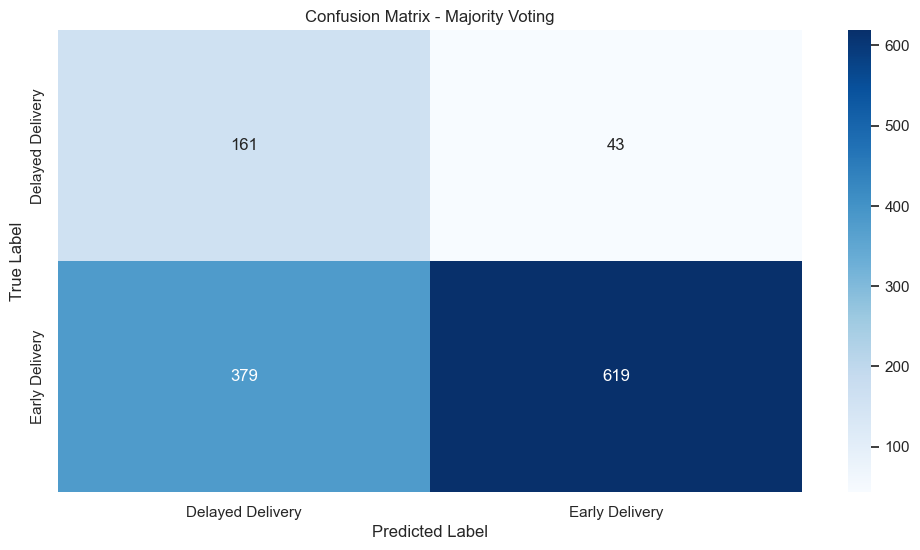

In [63]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, combined_predictions)
custom_labels = ['Delayed Delivery', 'Early Delivery']
# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Majority Voting');
plt.savefig("Confusion Matrix - Majority Voting.png", dpi=150)

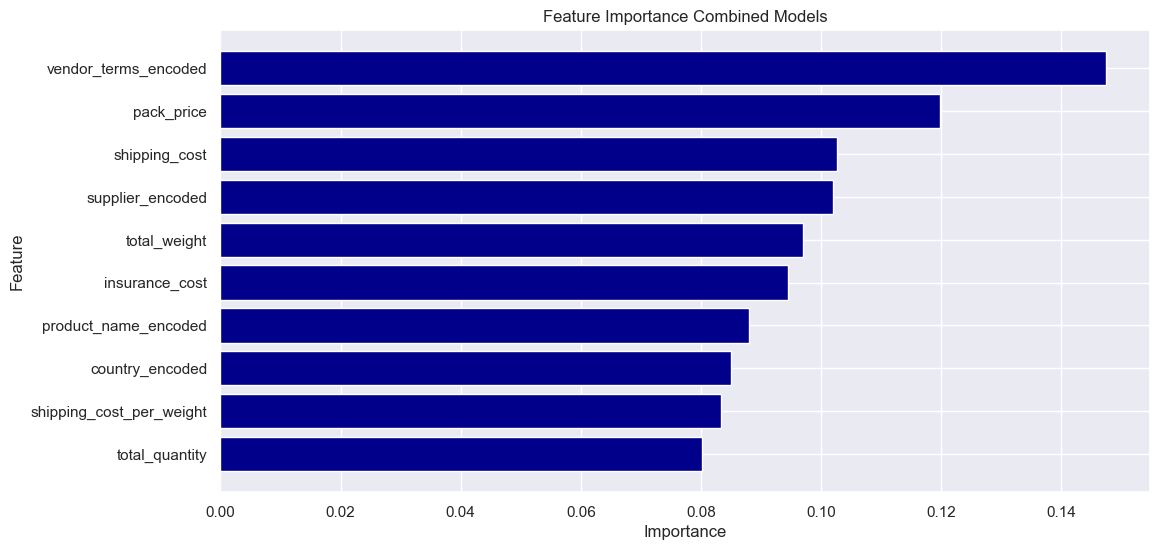

In [64]:
# Retrieve feature importance from each model
rf_feature_importance = best_rf_model.feature_importances_
lgb_feature_importance = best_lgb_model.feature_importances_
xgb_feature_importance = best_xgb_model.feature_importances_

# Optionally, normalize the feature importances
rf_feature_importance /= rf_feature_importance.sum()
lgb_feature_importance /= lgb_feature_importance.sum()
xgb_feature_importance /= xgb_feature_importance.sum()

# Combine feature importances using averaging
combined_feature_importance = (rf_feature_importance + lgb_feature_importance + xgb_feature_importance) / 3


# Calculate the feature importances
importances = combined_feature_importance

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Combined Models");
plt.savefig("Feature Importance Combined Models.png", dpi=150)

### Weighted Voting 

In [65]:
# Define weights for each model
weights = [0.4, 0.3, 0.3]

# Get probability scores from each model
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
lgb_probs = best_lgb_model.predict_proba(X_test)[:, 1]
xgb_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Weighted average of the probability scores
combined_probs = (weights[0] * rf_probs + weights[1] * lgb_probs + weights[2] * xgb_probs) / sum(weights)

# Binarize predictions based on the threshold
threshold = 0.5
combined_predictions = (combined_probs > threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, combined_predictions)
roc_auc = roc_auc_score(y_test, combined_probs)
precision, recall, f1, support = precision_recall_fscore_support(y_test, combined_predictions, average='binary')
accuracy = accuracy_score(y_test, combined_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, combined_predictions)

# Print evaluation summary
print(f"Accuracy of the combined model (Weighted Voting): {accuracy:.2f}")
print(f"Balanced Accuracy of the combined model (Weighted Voting): {balanced_accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(classification_report(y_test, combined_predictions))
print(conf_matrix)

Accuracy of the combined model (Weighted Voting): 0.65
Balanced Accuracy of the combined model (Weighted Voting): 0.70
Precision: 0.93, Recall: 0.63, F1-Score: 0.75
ROC AUC: 0.78
              precision    recall  f1-score   support

           0       0.30      0.77      0.43       204
           1       0.93      0.63      0.75       998

    accuracy                           0.65      1202
   macro avg       0.61      0.70      0.59      1202
weighted avg       0.82      0.65      0.69      1202

[[158  46]
 [374 624]]


In [66]:
# Data to be tabulated
data = {
    'Metric': ['Balanced Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [balanced_accuracy, precision, recall, f1,]
}

# Creating DataFrame
results_df = pd.DataFrame(data)

# Displaying the DataFrame
results_df.round(2)

Metric  Value
0  Balanced Accuracy   0.70
1          Precision   0.93
2             Recall   0.63
3           F1-Score   0.75

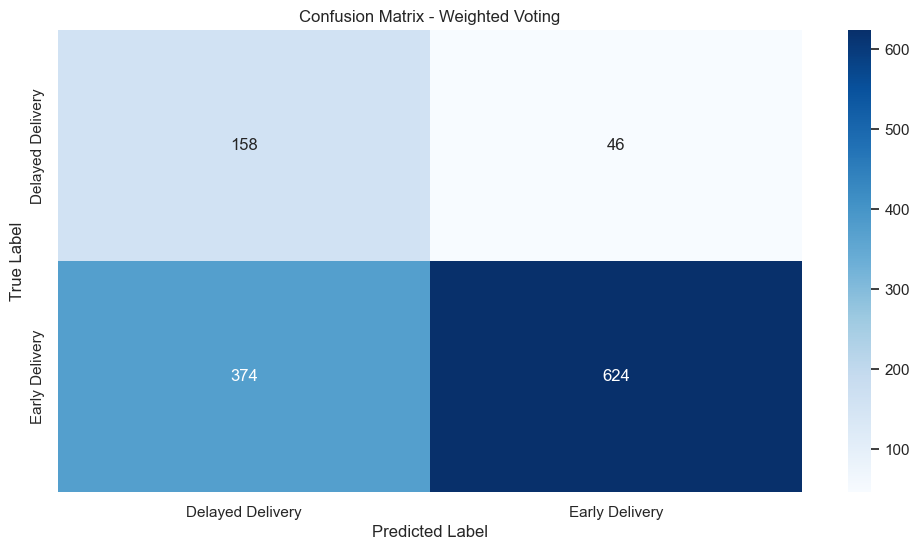

In [67]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, combined_predictions)
custom_labels = ['Delayed Delivery', 'Early Delivery']
# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Weighted Voting');
plt.savefig("Confusion Matrix - Weighted Voting.png", dpi=150)

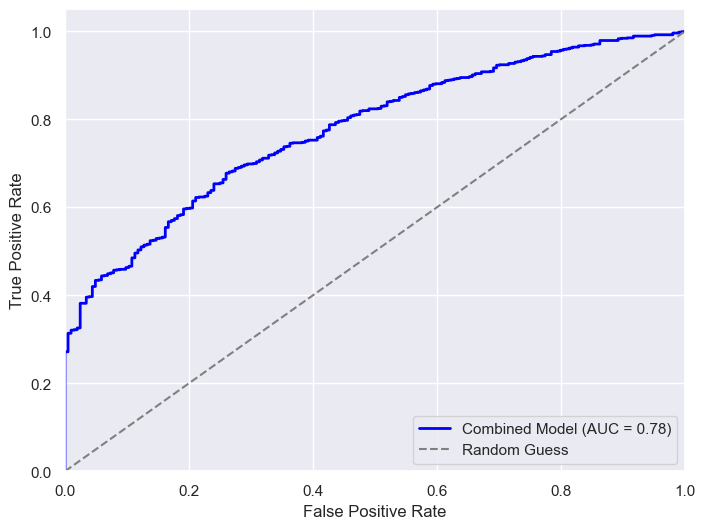

In [69]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, combined_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Combined Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve - Weighted Voting')
plt.legend(loc='lower right')
plt.savefig("ROC Curve - Weighted Voting.png", dpi=150)

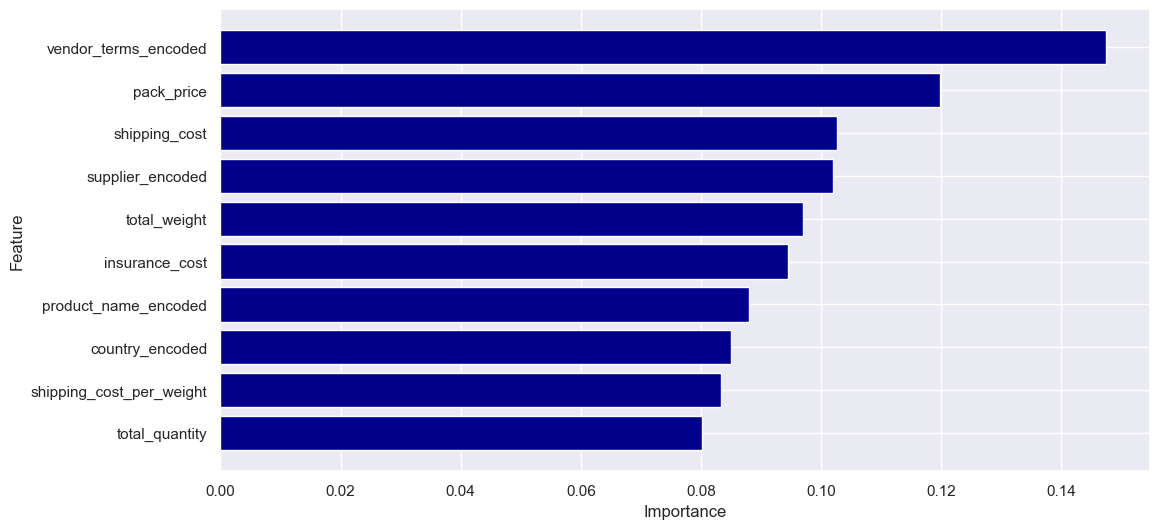

In [70]:
# Retrieve feature importance from each model
rf_feature_importance = best_rf_model.feature_importances_
lgb_feature_importance = best_lgb_model.feature_importances_
xgb_feature_importance = best_xgb_model.feature_importances_

# Optionally, normalize the feature importances
rf_feature_importance /= rf_feature_importance.sum()
lgb_feature_importance /= lgb_feature_importance.sum()
xgb_feature_importance /= xgb_feature_importance.sum()

# Combine feature importances using averaging
combined_feature_importance = (rf_feature_importance + lgb_feature_importance + xgb_feature_importance) / 3


# Calculate the feature importances
importances = combined_feature_importance

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel("Importance")
plt.ylabel("Feature");
# plt.title("Feature Importance Combined Models")
plt.savefig("Feature Importance Combined Models - Weighted Voting.png", dpi=150)